# COSC 2779 Deep learning: Assignment 2


In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/StanceDataset/

# Check current OS directory
!ls

Mounted at /content/gdrive/
/content/gdrive/My Drive/StanceDataset
glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


## Data Exploration & Analysis



### Data Retrieval

In [2]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [3]:
!pip install nltk

import nltk



In [4]:
# Read train and test dataset.
with open('train_shuffled.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [5]:
train_data.head(20)

Unnamed: 0  ...  Sentiment
0            0  ...        neg
1            1  ...        neg
2            2  ...        neg
3            3  ...        neg
4            4  ...        neg
5            5  ...        neg
6            6  ...        neg
7            7  ...        neg
8            8  ...        neg
9            9  ...        neg
10          10  ...        neg
11          11  ...        neg
12          12  ...        neg
13          13  ...        neg
14          14  ...        neg
15          15  ...        neg
16          16  ...        neg
17          17  ...        neg
18          18  ...      other
19          19  ...        neg

[20 rows x 7 columns]

In [6]:
test_data.head(20)
    

Tweet  ... Sentiment
0   He who exalts himself shall      be humbled; a...  ...       pos
1   RT @prayerbullets: I remove Nehushtan -previou...  ...     other
2   @Brainman365 @heidtjj @BenjaminLives I have so...  ...       pos
3   #God is utterly powerless without Human interv...  ...       neg
4   @David_Cameron   Miracles of #Multiculturalism...  ...       neg
5   This world needs a tight group hug. Tight enou...  ...       pos
6   Morality is not derived from religion, it prec...  ...       pos
7   A Godly husband  - knows you - trusts you - lo...  ...       pos
8   @SecularDutchess I'll be your huckleberry @Dea...  ...     other
9   #BIBLE = Big Irrelevant Book of Lies and Exagg...  ...       neg
10  If only dreams were real, now it's gone. #Sing...  ...       neg
11  Happy Independence Day to America and her beau...  ...       pos
12  Let my house be built by wisdom and become str...  ...       pos
13  These days, the cool kids are atheists.  #free...  ...       pos
14  Next time you hear someone say that our Foundi...  ...       neg
15  #ILoveIslamBecause and v should love Islam bec...  ...       pos
16  Be a sinner and sin strongly, but more strongl...  ...       pos
17  #God > My fears God > My insecurities God > My...  ...       pos
18  Mary, Queen of martyrs, pray for us. #Catholic...  ...       pos
19  America, like all of us, has both beauty and b...  ...       neg

[20 rows x 5 columns]

In [7]:

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


# train_data['Tweet'] = preprocess(train_data['Tweet'])

In [8]:
train_data['Tweet']

0       IF FEMINISTS WERE HONEST   "Tell me the truth ...
1       Watching teen mom and watching Farrah be a bit...
2       @AssaadRazzouk @TheEarthNetwork @wynnandreid U...
3       WOW.  Why is gay marriage legal but LESBIAN ma...
4       RT @ProLifeYouth: "It seems to me clear as day...
                              ...                        
2909    @FoxNews we just have to hang in there long en...
2910    #BeautyRant 7-Why have I been taught to hate m...
2911    We are thrilled to announce that we will be op...
2912     There use to be a glacier on the equator. #SemST
2913    When did people without taste buds decide to b...
Name: Tweet, Length: 2914, dtype: object

In [9]:

# Number of Stance
train_data['Stance'].unique()


array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [10]:

# Number of Target Topic
train_data['Target'].unique()

array(['Feminist Movement', 'Legalization of Abortion',
       'Climate Change is a Real Concern', 'Atheism', 'Hillary Clinton'],
      dtype=object)

### Observe Stance Distribution for each target topic

In [11]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

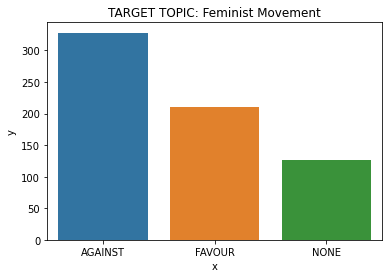

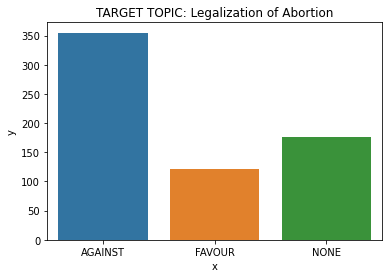

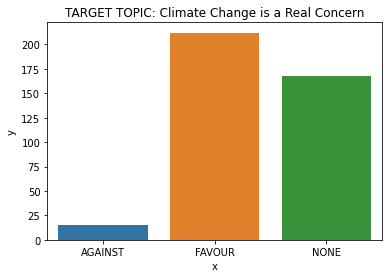

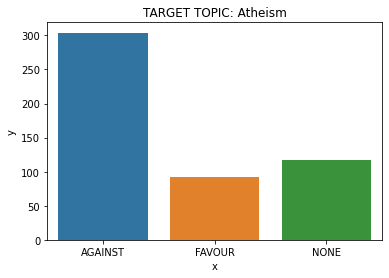

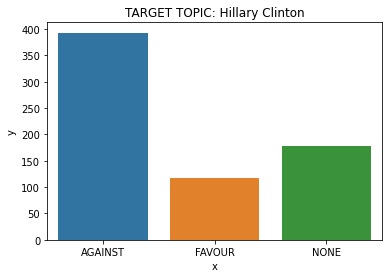

In [12]:
# Observe all topic distributions

for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
'''
top_N=20

txt = train_data['Tweet'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

plt.figure(figsize=(40,20))
rslt.plot.bar(rot=0)

plt.xticks(rotation=75)
'''

"\ntop_N=20\n\ntxt = train_data['Tweet'].str.lower().str.replace(r'\\|', ' ').str.cat(sep=' ')\nwords = nltk.tokenize.word_tokenize(txt)\nword_dist = nltk.FreqDist(words)\n\nstopwords = nltk.corpus.stopwords.words('english')\nwords_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) \n\nprint('All frequencies, including STOPWORDS:')\nprint('=' * 60)\nrslt = pd.DataFrame(word_dist.most_common(top_N),\n                    columns=['Word', 'Frequency'])\nprint(rslt)\nprint('=' * 60)\n\nrslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),\n                    columns=['Word', 'Frequency']).set_index('Word')\n\nplt.style.use('ggplot')\n\nplt.figure(figsize=(40,20))\nrslt.plot.bar(rot=0)\n\nplt.xticks(rotation=75)\n"

### Word Cloud (Train Data)

In [15]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


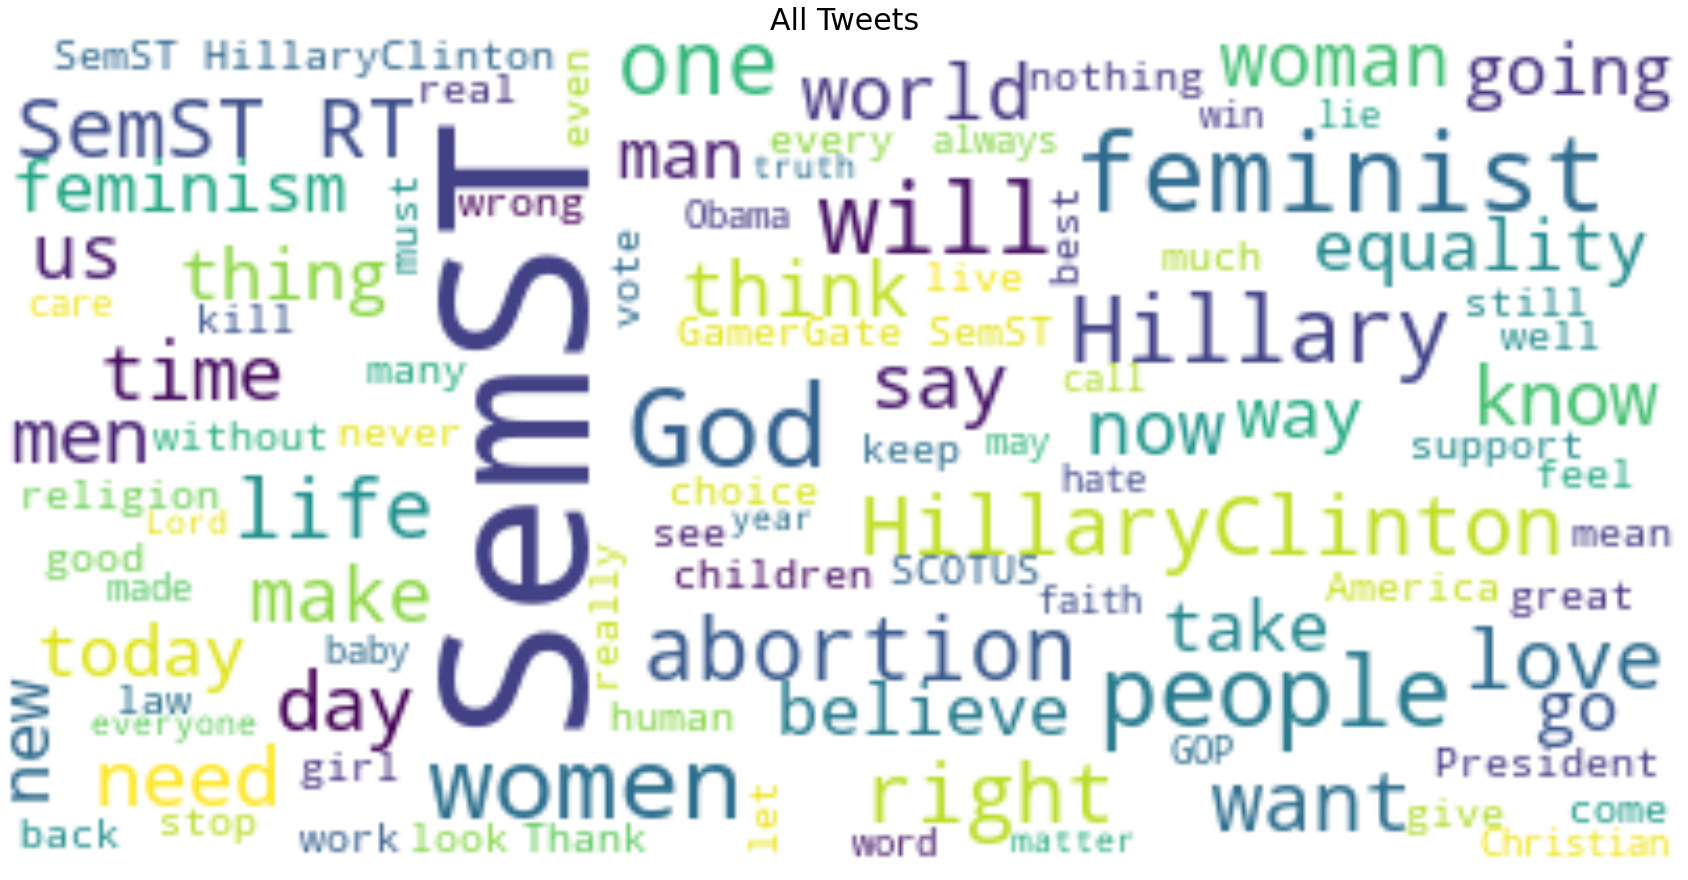

In [16]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

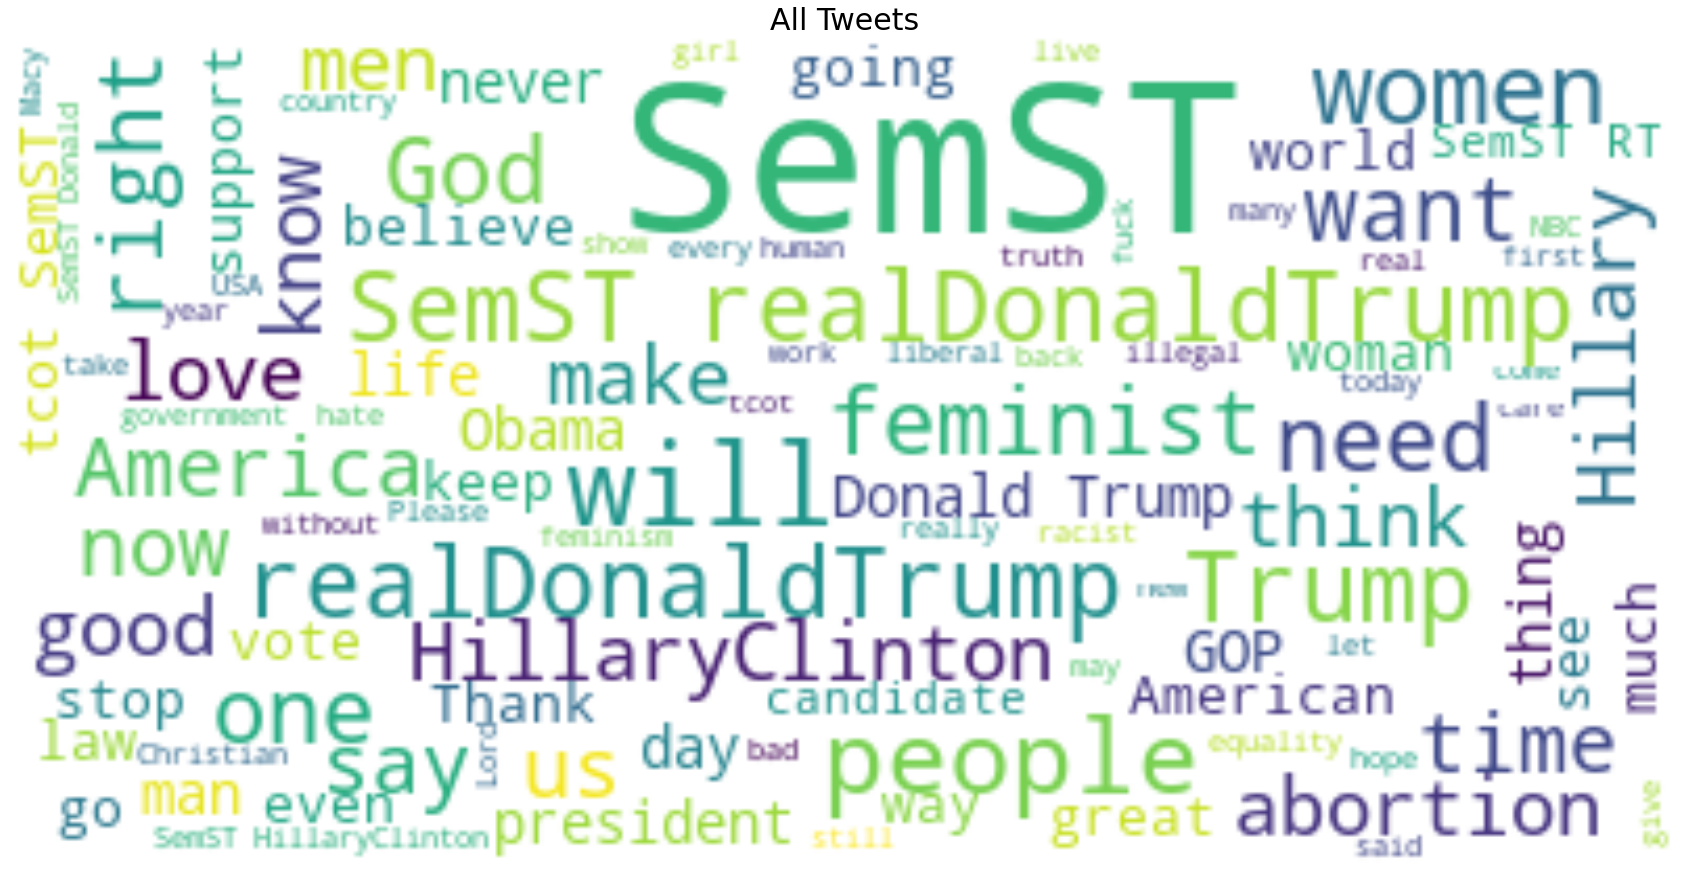

In [17]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [18]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

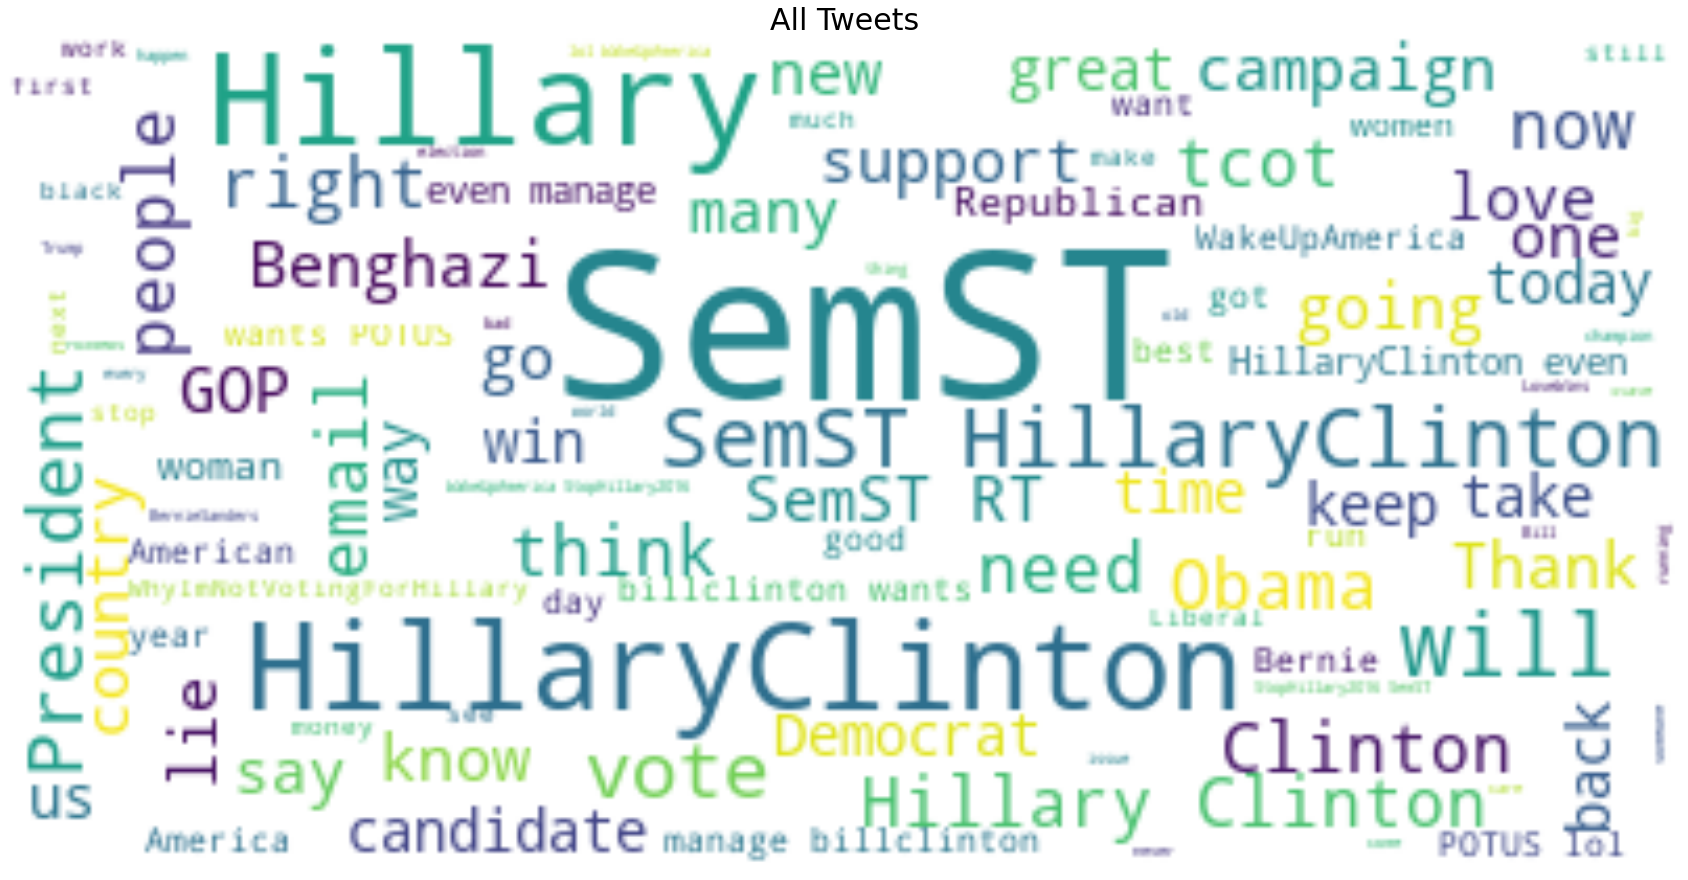

In [19]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

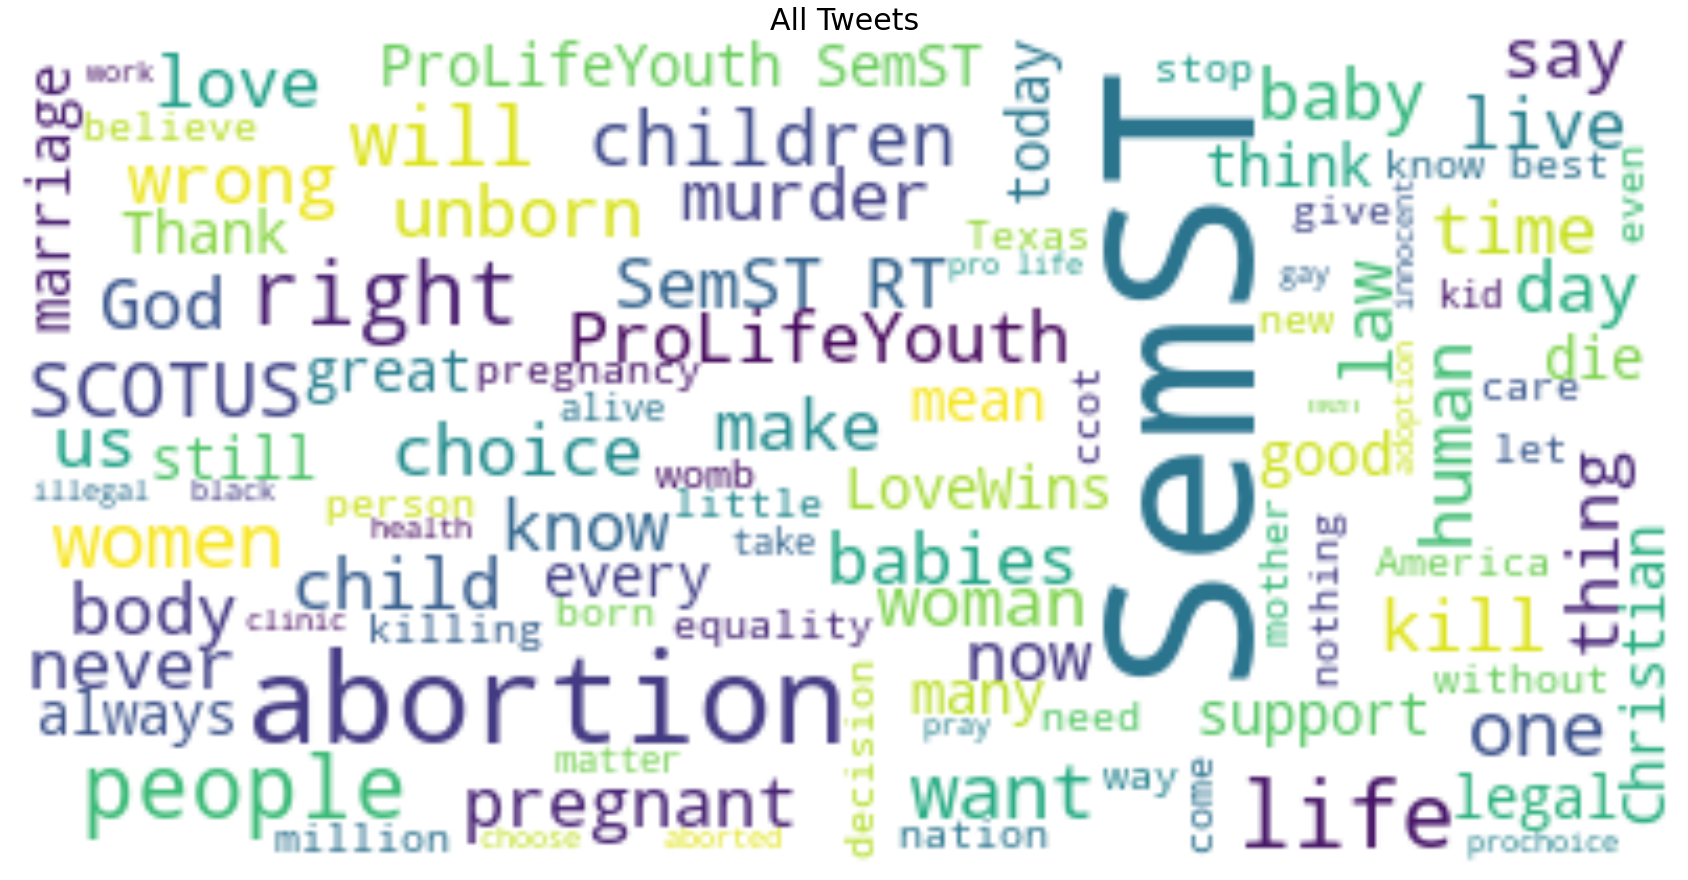

In [20]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

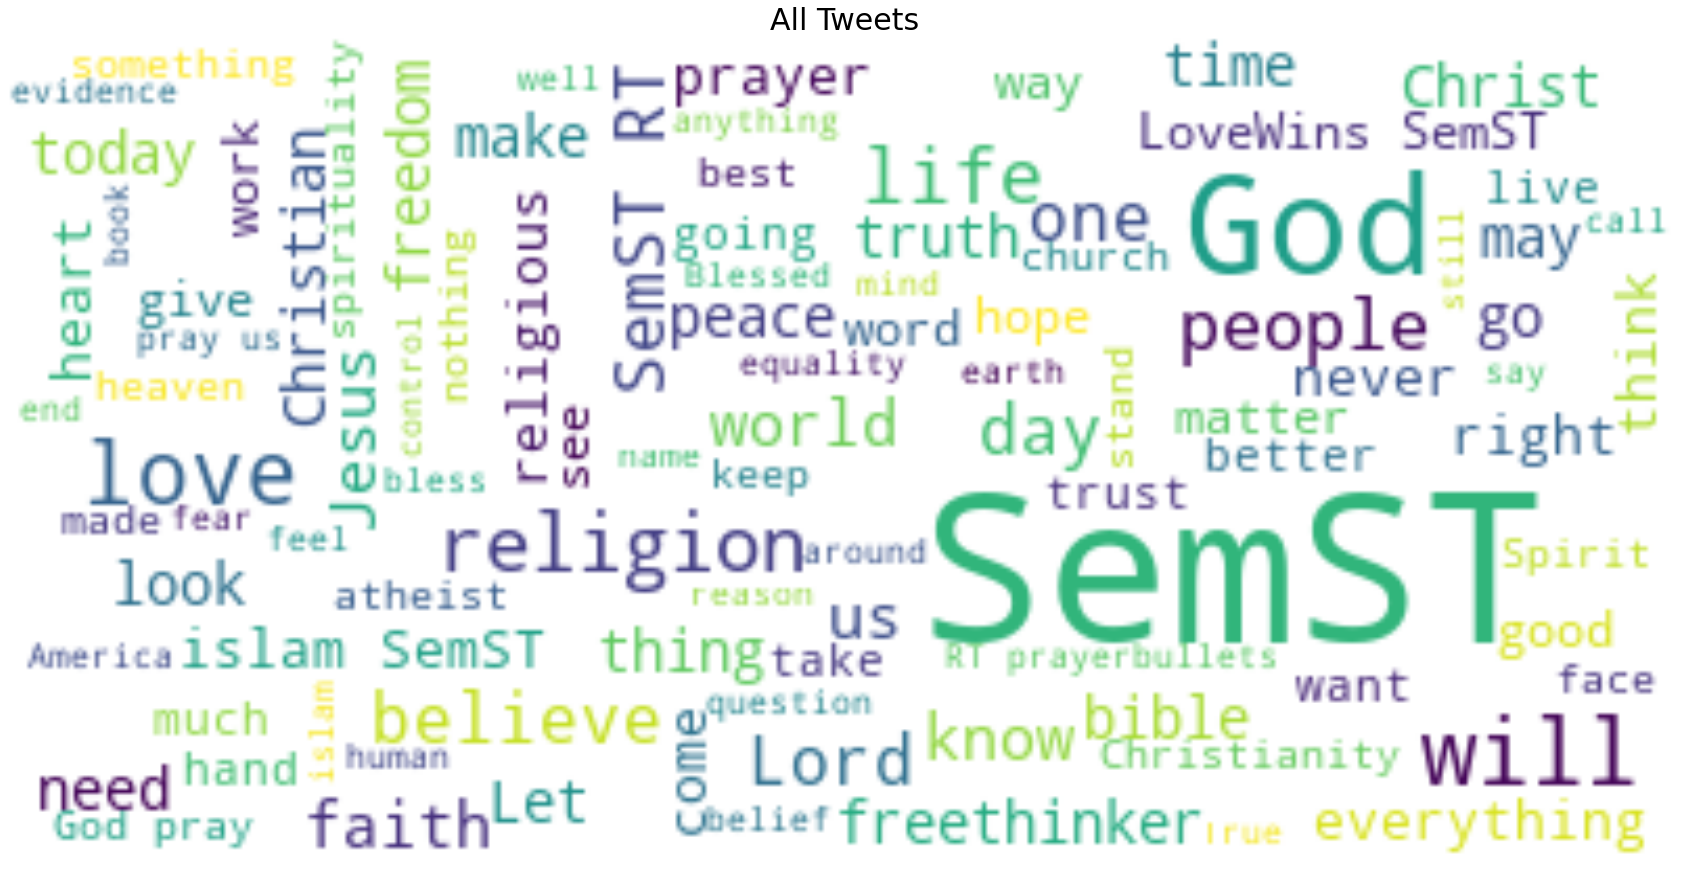

In [21]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

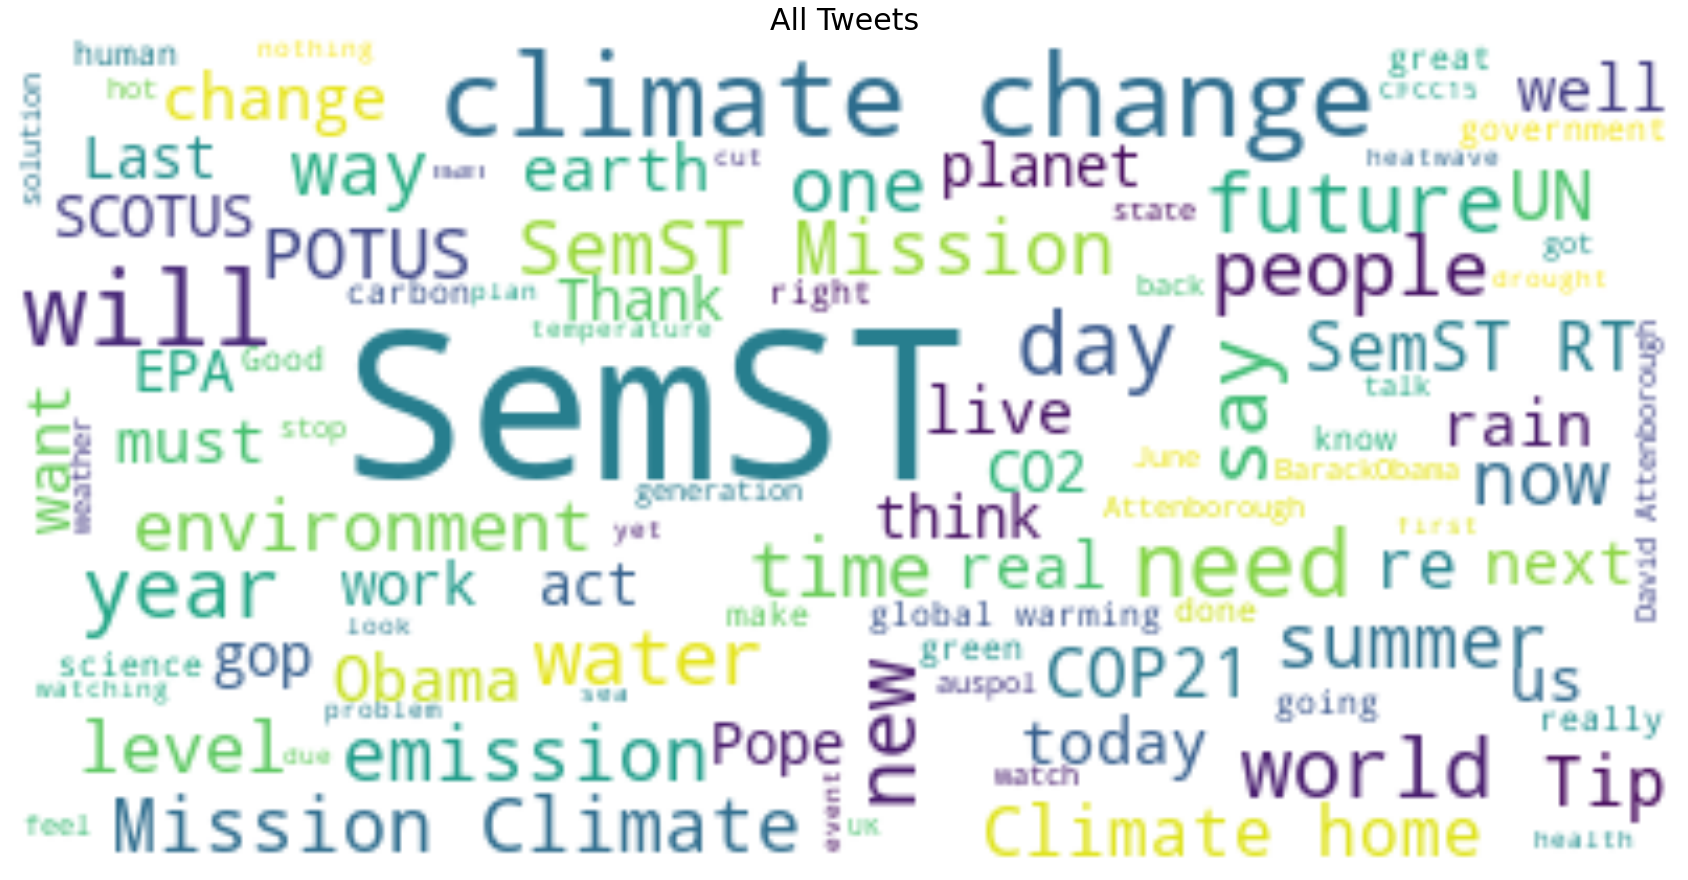

In [22]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

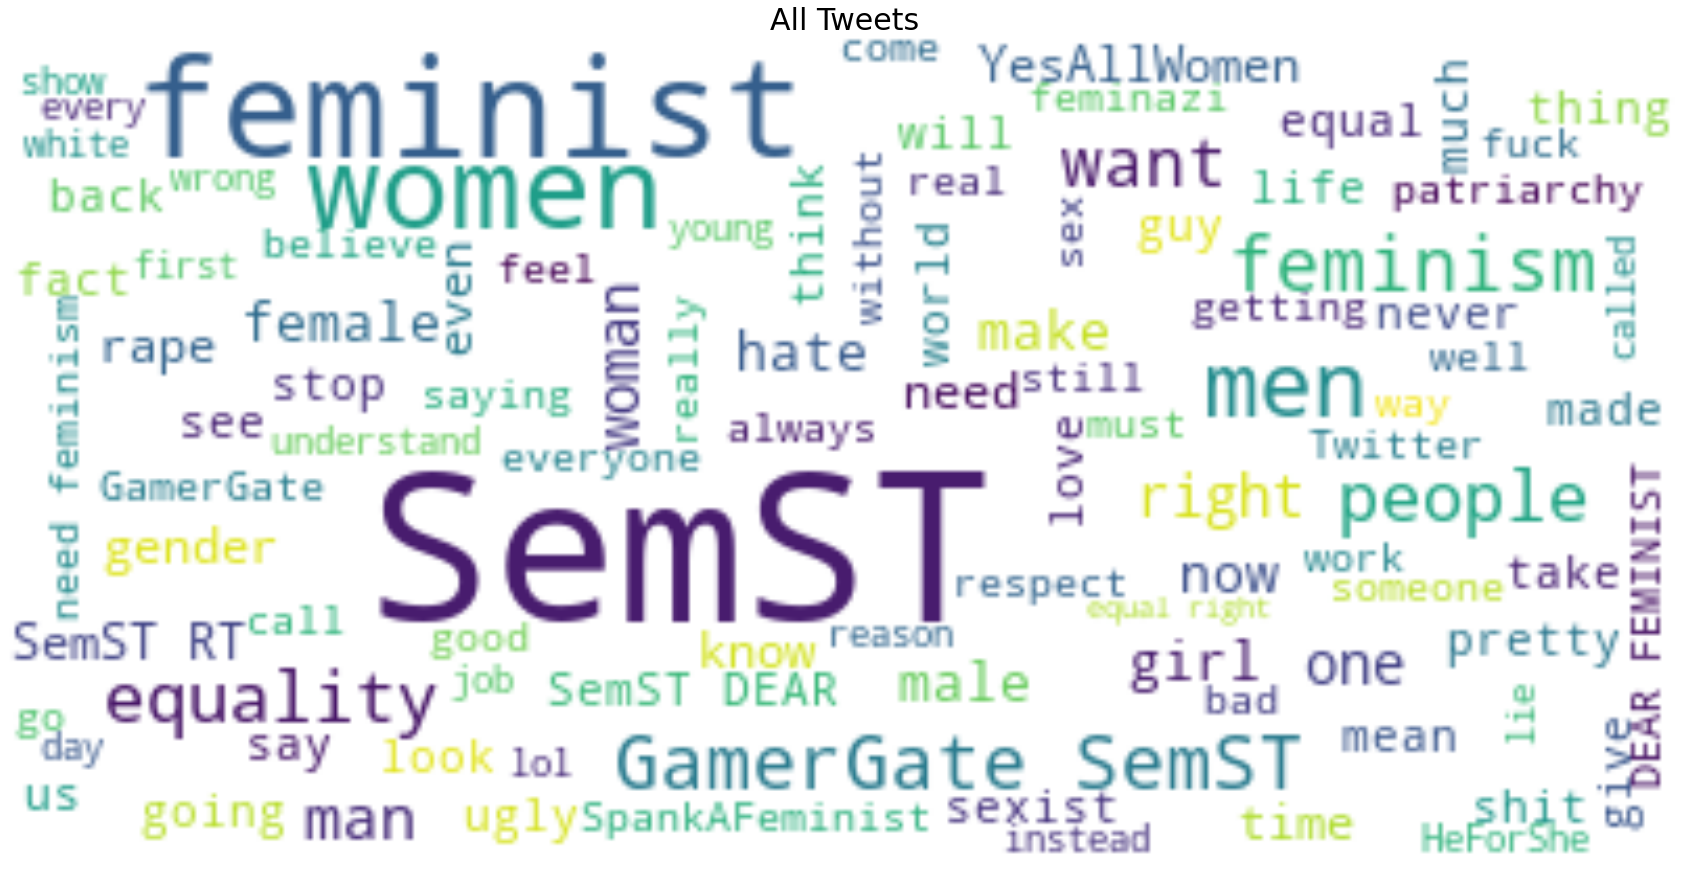

In [23]:
visualizeTopicWordCloud('Feminist Movement')

## Data Preparation

### Preparing Input & Target (x/y) values 

In [24]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

tweet_lines = list()
lines = train_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # Append lines to calculate max length
    lines_length.append(len(tokens))

    # Append pre-processed tokens
    tweet_lines.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
tweet_lines[:2]

[['if',
  'feminists',
  'were',
  'honest',
  'tell',
  'me',
  'the',
  'truth',
  'but',
  'make',
  'sure',
  'you',
  'agree',
  'with',
  'me',
  'gamergate',
  'semst'],
 ['watching',
  'teen',
  'mom',
  'and',
  'watching',
  'farrah',
  'be',
  'a',
  'bitch',
  'makes',
  'me',
  'believe',
  'in',
  'abortion',
  'that',
  'much',
  'more',
  'semst']]

In [26]:
max_length=max(lines_length)

max_length

33

In [27]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [28]:
tweet_lines_pad[:5]

array([[  25,   75,  134,  528,  285,   35,    2,  227,   38,   89,  386,
           8,  311,   23,   35,  104,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 387, 1237,  529,    9,  387, 3399,   15,    4,  579,  329,   35,
         121,   10,   61,   16,  124,   63,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3400, 3401, 3402,  286,    6, 1023,  530,    3, 3403,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 484,   65,    6,  242,  141,  312,   38, 2100,  141,  243,   14,
          32,    2,  367,  150,  889,   27,   70,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  53,  163,   13,  580,    3,   35,  773,   33, 3404,   16,   61,
          87,   15,    4,  531, 34

In [29]:
train_data['Target'][:5]

0                   Feminist Movement
1            Legalization of Abortion
2    Climate Change is a Real Concern
3                   Feminist Movement
4            Legalization of Abortion
Name: Target, dtype: object

In [30]:

target_lines = list()
lines = train_data['Target'].values.tolist()

target_lines_length = list()
for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    target_lines_length.append(len(tokens))

    target_lines.append(tokens)

In [31]:
target_max_length=max(target_lines_length)

target_max_length

6

In [32]:

sequences = tokenizer_obj.texts_to_sequences(target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [33]:
target_lines_pad[:5]

array([[  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0],
       [ 119,  108,    6,    4,  184, 6153],
       [  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0]], dtype=int32)

In [34]:
print("Tweet Lines Shape", tweet_lines_pad.shape)
print("Target Lines Shape", target_lines_pad.shape)


Tweet Lines Shape (2914, 33)
Target Lines Shape (2914, 6)


In [35]:
from keras import utils as np_utils

stance_list = []

for value in train_data['Stance']:
  if value == "FAVOR":
    stance_list.append(0)
  elif value == "NONE":
    stance_list.append(1)
  elif value == "AGAINST":
    stance_list.append(2)


stance_list = np_utils.to_categorical(stance_list)

In [36]:

print("Tweet x Shape", tweet_lines_pad.shape )
print("Target x Shape", target_lines_pad.shape)
print("Stance y Shape", stance_list.shape)

Tweet x Shape (2914, 33)
Target x Shape (2914, 6)
Stance y Shape (2914, 3)


### Preparing Test Dataset

In [37]:
# Removing Donald Trump Target Topic
test_data = test_data[test_data['Target'] != "Donald Trump"]

In [38]:

test_tweet_lines = list()
lines = test_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    lines_length.append(len(tokens))

    test_tweet_lines.append(tokens)

In [39]:
sequences = tokenizer_obj.texts_to_sequences(test_tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [40]:
# Check unique Target values for test data
test_data['Target'].unique()

array(['Atheism', 'Climate Change is a Real Concern', 'Feminist Movement',
       'Hillary Clinton', 'Legalization of Abortion'], dtype=object)

In [41]:
test_target_lines = list()
lines = test_data['Target'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    lines_length.append(len(tokens))

    test_target_lines.append(tokens)

In [42]:
sequences = tokenizer_obj.texts_to_sequences(test_target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [43]:
test_stance_list = []

for value in test_data['Stance']:
  if value == "FAVOR":
    test_stance_list.append(0)
  elif value == "NONE":
    test_stance_list.append(1)
  elif value == "AGAINST":
    test_stance_list.append(2)

test_stance_list = np_utils.to_categorical(test_stance_list)

In [44]:
print("Test Tweets Shape", test_tweet_lines_pad.shape)
print("Test Targets Shape",test_target_lines_pad.shape)
print("Test Stance Shape",test_stance_list.shape)

Test Tweets Shape (1249, 33)
Test Targets Shape (1249, 6)
Test Stance Shape (1249, 3)


In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
    
def getTestAccuracy(model):
    y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    test_stance_list_max= np.argmax(test_stance_list, axis=1)

    return str("{:.2f}".format(accuracy_score(test_stance_list_max, y_pred_max) * 100))+"%"

In [63]:
def getF1Score(model):
    y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    test_stance_list_max= np.argmax(test_stance_list, axis=1)

    return str("{:.2f}".format(f1_score(test_stance_list_max, y_pred_max, average="macro") * 100))+"%"

### Importing GloVe Twitter Embedding Vector

In [47]:
!ls

glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


In [48]:
# Import Preloaded Embedding Vectors.
E_T_25d = np.loadtxt("glove.twitter.25d.preloaded.txt")
E_T_100d = np.loadtxt("glove.twitter.100d.preloaded.txt")
E_T_200d = np.loadtxt("glove.twitter.200d.preloaded.txt")

In [49]:
print("25d preloaded vector shape:", E_T_25d.shape)
print("100d preloaded vector shape:", E_T_100d.shape)
print("200d preloaded vector shape:", E_T_200d.shape)

25d preloaded vector shape: (9245, 25)
100d preloaded vector shape: (9245, 100)
200d preloaded vector shape: (9245, 200)


### Prepare Visualization Tools

In [50]:
from itertools import cycle
def plotter(history_hold, metric = 'loss', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

In [51]:
# plot the evolution of Loss and Acuracy on the train and validation sets
import matplotlib.pyplot as plt

def plotter_single(history):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [82]:
def compare_params(metric="loss", h_histories= {}, params_list=[], param_name="Lambda", model_name="model_"):
  plt.figure(figsize=(10,5))
  l_train = list()
  l_val = list()

  for param in params_list:
    l_train.append(h_histories[model_name+ '_h' + str(param)].history[metric][-1])
    l_val.append(h_histories[model_name+ '_h' + str(param)].history['val_' + metric][-1])

  plt.plot(params_list,l_train, 'ro', label='Train' )
  plt.plot(params_list,l_val, 'bs', label='Test' )

  plt.xlabel(param_name, fontsize=14)
  plt.ylabel(metric, fontsize=14)
  plt.legend()
  plt.show()

## Model #1: Multi-input RNN Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,Input, Multiply, Concatenate

from tensorflow.keras import regularizers
from tensorflow.keras import Model
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

from tensorflow.keras import initializers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def tiny_model(embedding_dim = 25, E_T = E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Bidirectional(LSTM(x_RNN_dim, return_sequences=False))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Bidirectional(LSTM(y_RNN_dim, return_sequences=False))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu")(combined)
  
  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
tiny_model_train = tiny_model()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 2
SHUFFLE = True

history = tiny_model_train.fit(
                  x=[tweet_lines_pad,target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE)

Epoch 1/50
73/73 - 3s - loss: 1.0170 - accuracy: 0.5191 - val_loss: 0.9634 - val_accuracy: 0.5489
Epoch 2/50
73/73 - 1s - loss: 0.9603 - accuracy: 0.5470 - val_loss: 0.9360 - val_accuracy: 0.5592
Epoch 3/50
73/73 - 1s - loss: 0.9389 - accuracy: 0.5676 - val_loss: 0.9227 - val_accuracy: 0.5592
Epoch 4/50
73/73 - 1s - loss: 0.9198 - accuracy: 0.5834 - val_loss: 0.9147 - val_accuracy: 0.5729
Epoch 5/50
73/73 - 1s - loss: 0.8969 - accuracy: 0.5937 - val_loss: 0.9237 - val_accuracy: 0.5815
Epoch 6/50
73/73 - 1s - loss: 0.8743 - accuracy: 0.6010 - val_loss: 0.8969 - val_accuracy: 0.5969
Epoch 7/50
73/73 - 1s - loss: 0.8558 - accuracy: 0.6096 - val_loss: 0.8963 - val_accuracy: 0.6003
Epoch 8/50
73/73 - 1s - loss: 0.8126 - accuracy: 0.6293 - val_loss: 0.9055 - val_accuracy: 0.6003
Epoch 9/50
73/73 - 1s - loss: 0.7937 - accuracy: 0.6474 - val_loss: 0.9002 - val_accuracy: 0.6089
Epoch 10/50
73/73 - 1s - loss: 0.7624 - accuracy: 0.6645 - val_loss: 0.8975 - val_accuracy: 0.6175
Epoch 11/50
73/73 -

In [ ]:
# Tiny Model Test Accuracy
getTestAccuracy(tiny_model_train)

'56.29%'

### Simple model with 25-dimensional embedding vector

In [ ]:
def tiny_model_with_reg(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4, E_T=E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = Bidirectional(LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = tf.keras.layers.Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(combined)

  z = Dropout(dropout_rate)(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
tiny_model_with_reg_train = tiny_model_with_reg()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 2
SHUFFLE = True

history_tiny_model_with_reg = tiny_model_with_reg_train.fit(
                              x=[tweet_lines_pad,target_lines_pad],
                              y=stance_list,
                              validation_split=VAL_SPLIT,
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE,
                              verbose=VERBOSE,
                              shuffle=SHUFFLE)

Epoch 1/50
73/73 - 4s - loss: 1.0899 - accuracy: 0.4663 - val_loss: 1.0038 - val_accuracy: 0.5523
Epoch 2/50
73/73 - 3s - loss: 1.0098 - accuracy: 0.5393 - val_loss: 0.9894 - val_accuracy: 0.5403
Epoch 3/50
73/73 - 3s - loss: 0.9980 - accuracy: 0.5448 - val_loss: 0.9704 - val_accuracy: 0.5523
Epoch 4/50
73/73 - 3s - loss: 0.9881 - accuracy: 0.5363 - val_loss: 0.9646 - val_accuracy: 0.5506
Epoch 5/50
73/73 - 3s - loss: 0.9821 - accuracy: 0.5354 - val_loss: 0.9588 - val_accuracy: 0.5540
Epoch 6/50
73/73 - 3s - loss: 0.9830 - accuracy: 0.5427 - val_loss: 0.9657 - val_accuracy: 0.5557
Epoch 7/50
73/73 - 3s - loss: 0.9791 - accuracy: 0.5457 - val_loss: 0.9570 - val_accuracy: 0.5557
Epoch 8/50
73/73 - 3s - loss: 0.9648 - accuracy: 0.5474 - val_loss: 0.9584 - val_accuracy: 0.5557
Epoch 9/50
73/73 - 3s - loss: 0.9649 - accuracy: 0.5560 - val_loss: 0.9522 - val_accuracy: 0.5575
Epoch 10/50
73/73 - 3s - loss: 0.9599 - accuracy: 0.5534 - val_loss: 0.9492 - val_accuracy: 0.5575
Epoch 11/50
73/73 -

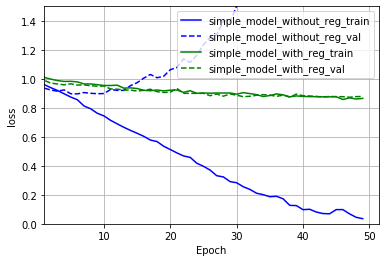

In [ ]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_tiny_model_with_reg
plotter(histories, ylim=[0.0,1.5])

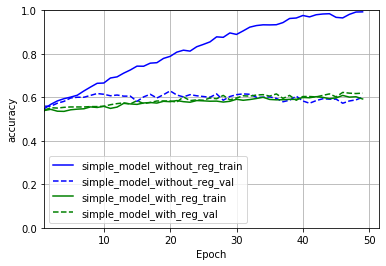

In [ ]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_tiny_model_with_reg
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

### Simple model with 100-dimensional embedding vector

In [ ]:
tiny_model_with_reg_100d_train = tiny_model_with_reg(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_tiny_model_with_reg_100d = tiny_model_with_reg_100d_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE)

Epoch 1/30
73/73 [==============================] - 6s 77ms/step - loss: 1.0984 - accuracy: 0.4736 - val_loss: 1.0479 - val_accuracy: 0.5232
Epoch 2/30
73/73 [==============================] - 4s 54ms/step - loss: 1.0173 - accuracy: 0.5431 - val_loss: 0.9991 - val_accuracy: 0.5232
Epoch 3/30
73/73 [==============================] - 4s 53ms/step - loss: 1.0115 - accuracy: 0.5410 - val_loss: 0.9888 - val_accuracy: 0.5352
Epoch 4/30
73/73 [==============================] - 4s 53ms/step - loss: 0.9974 - accuracy: 0.5405 - val_loss: 0.9734 - val_accuracy: 0.5609
Epoch 5/30
73/73 [==============================] - 4s 54ms/step - loss: 0.9688 - accuracy: 0.5495 - val_loss: 0.9677 - val_accuracy: 0.5575
Epoch 6/30
73/73 [==============================] - 4s 53ms/step - loss: 0.9507 - accuracy: 0.5659 - val_loss: 0.9459 - val_accuracy: 0.5660
Epoch 7/30
73/73 [==============================] - 4s 55ms/step - loss: 0.9295 - accuracy: 0.5839 - val_loss: 0.9203 - val_accuracy: 0.5901
Epoch 8/30
73

In [ ]:
getTestAccuracy(tiny_model_with_reg_100d_train)

'62.53%'

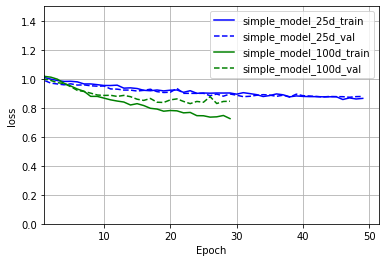

In [ ]:
histories = {}

histories['simple_model_25d'] = history_tiny_model_with_reg
histories['simple_model_100d'] = history_tiny_model_with_reg_100d

plotter(histories, ylim=[0.0,1.5])

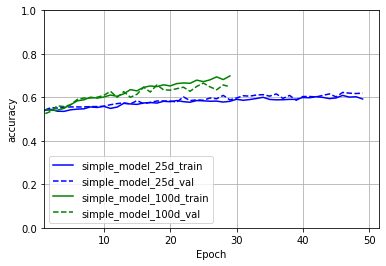

In [ ]:
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

## Model #2: Multi-input RNN Model with Attention Layer

Attention layer source: https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/

In [53]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
def model_with_attention(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)



  ##########################
  # Attention Layer
  ##########################
    
    
  attention_output_1 = attention()(x)
  attention_output_2 = attention()(y)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_1)

  z = Dropout(dropout_rate)(z)
    
    
  q = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_2)

  q = Dropout(dropout_rate)(q)
    
    
  ##########################
  # Merging of Streams
  ##########################
    
  combined = Concatenate()([z,q])


  finalOutput = Dense(nb_classes, activation="softmax")(combined)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=finalOutput)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
model_with_attention_train = model_with_attention(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.25
EPOCHS = 80
BATCH_SIZE = 64
VERBOSE = 1
SHUFFLE = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_with_attention = model_with_attention_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE,
        callbacks=CALLBACKS)

Epoch 1/80
35/35 [==============================] - 4s 103ms/step - loss: 1.1090 - accuracy: 0.4888 - val_loss: 1.0622 - val_accuracy: 0.5514
Epoch 2/80
35/35 [==============================] - 3s 73ms/step - loss: 1.0492 - accuracy: 0.5423 - val_loss: 1.0277 - val_accuracy: 0.5514
Epoch 3/80
35/35 [==============================] - 2s 71ms/step - loss: 1.0255 - accuracy: 0.5487 - val_loss: 1.0036 - val_accuracy: 0.5514
Epoch 4/80
35/35 [==============================] - 2s 69ms/step - loss: 1.0049 - accuracy: 0.5474 - val_loss: 1.0066 - val_accuracy: 0.5501
Epoch 5/80
35/35 [==============================] - 2s 67ms/step - loss: 0.9943 - accuracy: 0.5524 - val_loss: 0.9694 - val_accuracy: 0.5583
Epoch 6/80
35/35 [==============================] - 2s 70ms/step - loss: 0.9768 - accuracy: 0.5570 - val_loss: 0.9572 - val_accuracy: 0.5789
Epoch 7/80
35/35 [==============================] - 2s 69ms/step - loss: 0.9595 - accuracy: 0.5739 - val_loss: 0.9961 - val_accuracy: 0.5652
Epoch 8/80
3

In [ ]:
getTestAccuracy(model_with_attention_train)

'60.29%'

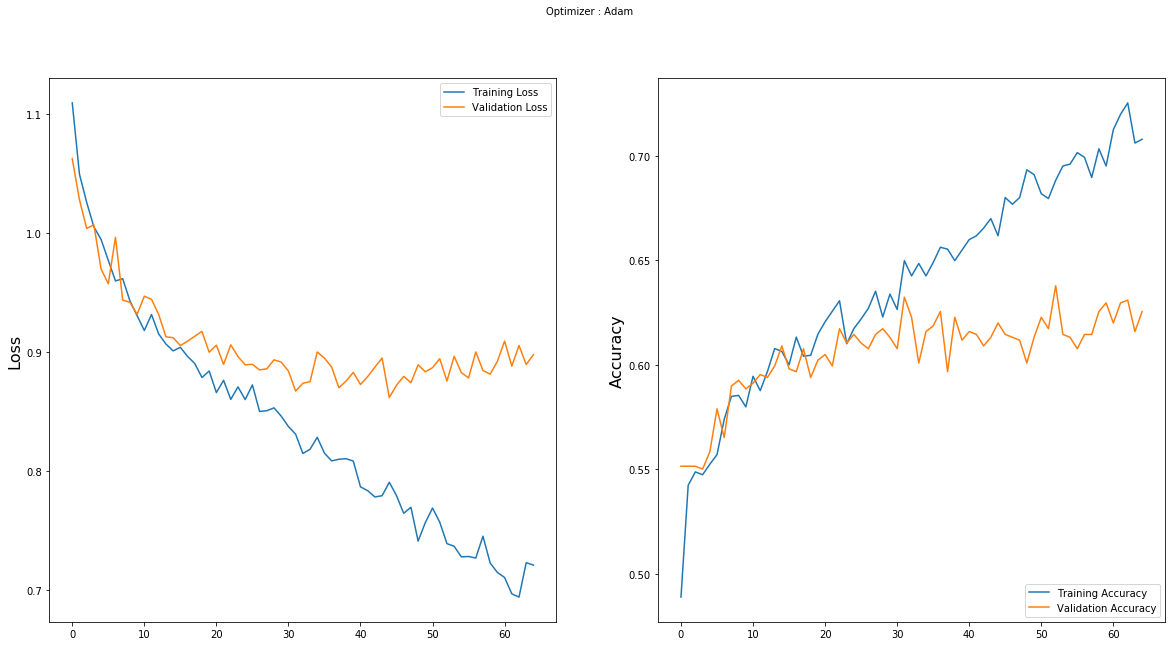

In [ ]:
plotter_single(history_model_with_attention)

## Model #3: Model with Tweet input conditioned with Target input

In [55]:
def model_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, E_T=E_T_100d, learning_rate=0.0004):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # Second Branch (Tweet)
  # Initalize Second Branch with First Branch encoding.
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  tweet_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(tweet_encoder_out)
  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.


  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet,inputTarget ], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = learning_rate
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr="0.0005")

CALLBACKS = [early_stopping, lr_reducer]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 16s 221ms/step - loss: 5.4437 - accuracy: 0.3754 - val_loss: 4.6155 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 16s 215ms/step - loss: 4.4569 - accuracy: 0.4663 - val_loss: 3.9736 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 15s 210ms/step - loss: 3.8596 - accuracy: 0.5036 - val_loss: 3.5370 - val_accuracy: 0.4700
Epoch 4/200
73/73 [==============================] - 15s 209ms/step - loss: 3.4263 - accuracy: 0.5354 - val_loss: 3.2062 - val_accuracy: 0.5249
Epoch 5/200
73/73 [==============================] - 15s 210ms/step - loss: 3.1267 - accuracy: 0.5504 - val_loss: 2.9409 - val_accuracy: 0.5472
Epoch 6/200
73/73 [==============================] - 15s 210ms/step - loss: 2.8799 - accuracy: 0.5628 - val_loss: 2.7231 - val_accuracy: 0.5489
Epoch 7/200
73/73 [==============================] - 15s 210ms/step - loss: 2.6668 - accuracy: 0.5641 - val_loss: 2.5318 - val_accuracy:

In [ ]:
getTestAccuracy(model_conditional_encoding_train)

'66.77%'

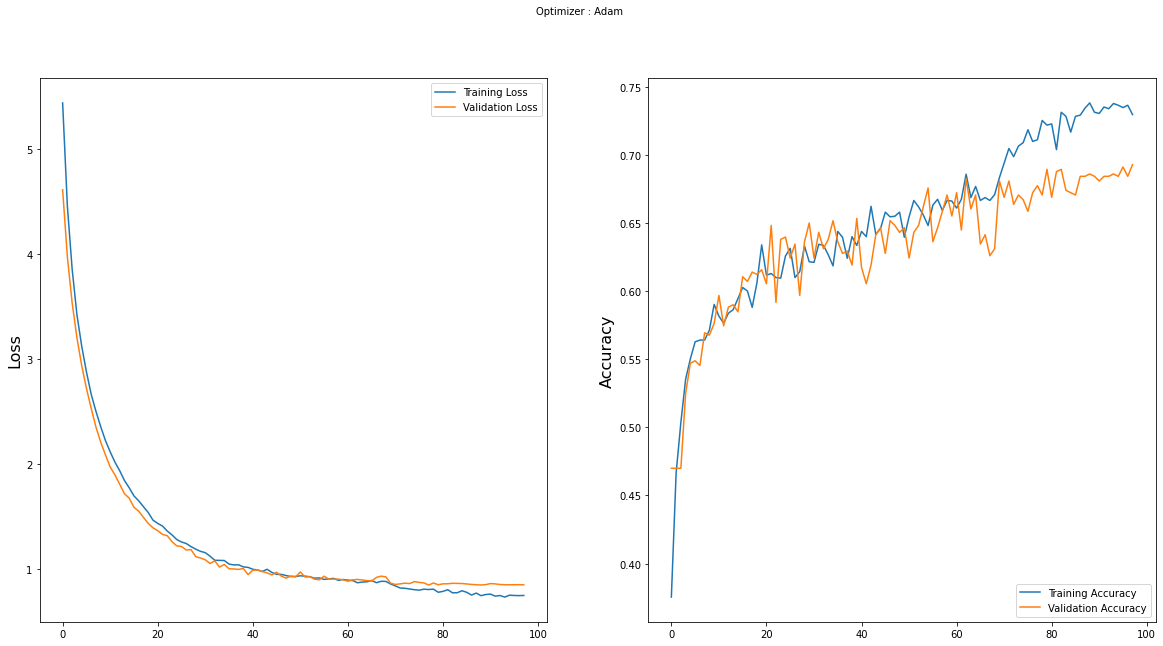

In [ ]:
plotter_single(history_model_conditional_encoding)

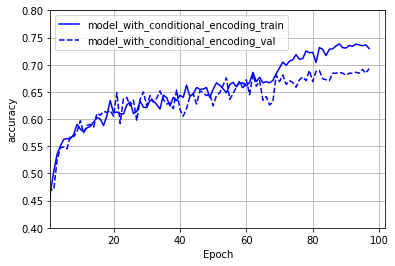

In [ ]:
histories = {}

histories["model_with_conditional_encoding"] = history_model_conditional_encoding

plotter(histories, metric="accuracy", ylim=[0.4,0.8])


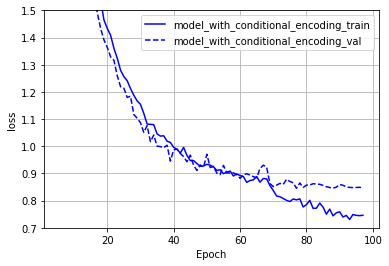

In [ ]:

plotter(histories, ylim=[0.7, 1.5])

In [56]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = 0.0002)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 95
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr=0.00002)

CALLBACKS = [early_stopping, lr_reducer]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/95
73/73 [==============================] - 17s 237ms/step - loss: 5.7057 - accuracy: 0.3719 - val_loss: 5.0922 - val_accuracy: 0.4700
Epoch 2/95
73/73 [==============================] - 16s 225ms/step - loss: 5.0576 - accuracy: 0.4230 - val_loss: 4.6194 - val_accuracy: 0.4700
Epoch 3/95
73/73 [==============================] - 16s 222ms/step - loss: 4.5928 - accuracy: 0.4590 - val_loss: 4.2420 - val_accuracy: 0.4820
Epoch 4/95
73/73 [==============================] - 16s 223ms/step - loss: 4.2267 - accuracy: 0.5075 - val_loss: 3.9451 - val_accuracy: 0.5214
Epoch 5/95
73/73 [==============================] - 16s 223ms/step - loss: 3.9437 - accuracy: 0.5242 - val_loss: 3.6973 - val_accuracy: 0.5420
Epoch 6/95
73/73 [==============================] - 16s 226ms/step - loss: 3.7090 - accuracy: 0.5324 - val_loss: 3.4748 - val_accuracy: 0.5557
Epoch 7/95
73/73 [==============================] - 16s 224ms/step - loss: 3.4987 - accuracy: 0.5384 - val_loss: 3.2874 - val_accuracy: 0.5523

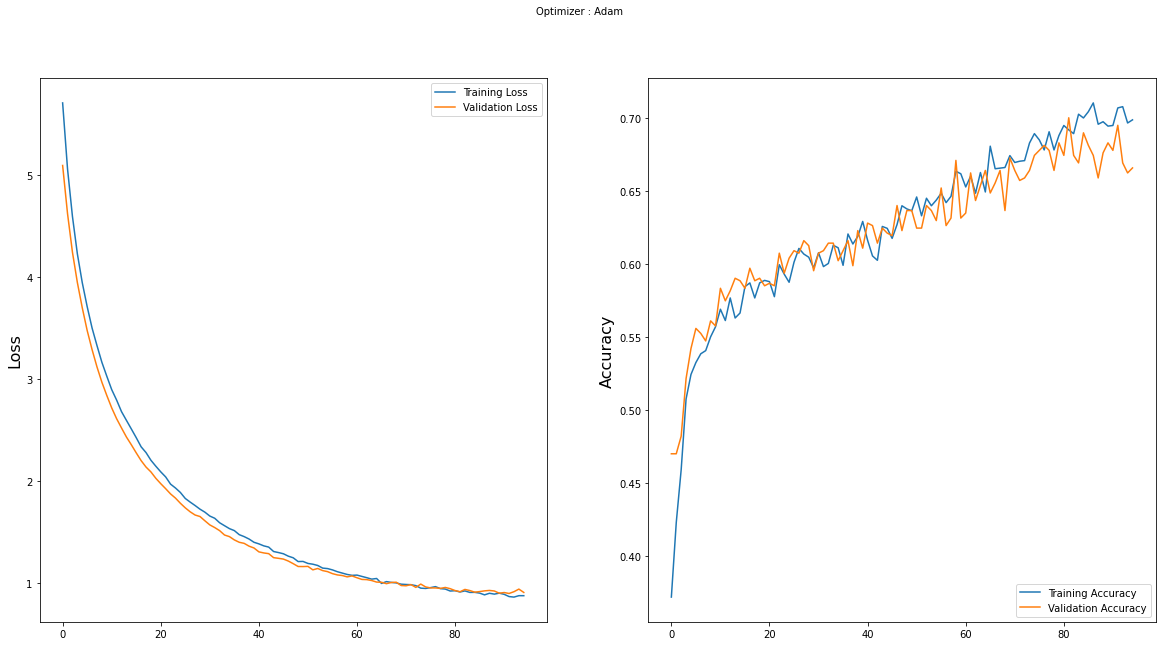

In [58]:
plotter_single(history_model_conditional_encoding)

In [59]:
getTestAccuracy(model_conditional_encoding_train)

'67.57%'

In [64]:
getF1Score(model_conditional_encoding_train)

'60.81%'

In [ ]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=10, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
38/73 [==============>...............] - ETA: 5s - loss: 5.3224 - accuracy: 0.3988

## Model #4: Model with bidirectional conditional encoding

In [ ]:
def model_bi_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.003, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Target)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # First Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False,
                                    return_state = True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  (tweet_encoder, tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s) = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  a = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  a = Dropout(dropout_rate)(a)

  target_encoding_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding_2, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding_2(a,initial_state=[tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s])



  ##########################
  # Second Branch (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  b = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  b = Dropout(dropout_rate)(b)

  tweet_encoder_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  final_encoder_out = tweet_encoder_2(b, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(final_encoder_out)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  FC_dim_3 = 128
  nb_classes = 3


  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)
    
  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=z)

    ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.0005
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  

  return model


In [ ]:
model_bi_conditional_encoding_train = model_bi_conditional_encoding(embedding_dim=200, E_T = E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_bi_conditional_encoding = model_bi_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 32s 438ms/step - loss: 8.2072 - accuracy: 0.4024 - val_loss: 6.0452 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 31s 418ms/step - loss: 5.3228 - accuracy: 0.4710 - val_loss: 4.3914 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 30s 416ms/step - loss: 4.0936 - accuracy: 0.5234 - val_loss: 3.6355 - val_accuracy: 0.4700
Epoch 4/200
73/73 [==============================] - 31s 427ms/step - loss: 3.4547 - accuracy: 0.5405 - val_loss: 3.1803 - val_accuracy: 0.4820
Epoch 5/200
73/73 [==============================] - 31s 419ms/step - loss: 3.0524 - accuracy: 0.5586 - val_loss: 2.8411 - val_accuracy: 0.5540
Epoch 6/200
73/73 [==============================] - 30s 416ms/step - loss: 2.7534 - accuracy: 0.5654 - val_loss: 2.5823 - val_accuracy: 0.5678
Epoch 7/200
73/73 [==============================] - 30s 417ms/step - loss: 2.5001 - accuracy: 0.5839 - val_loss: 2.3554 - val_accuracy:

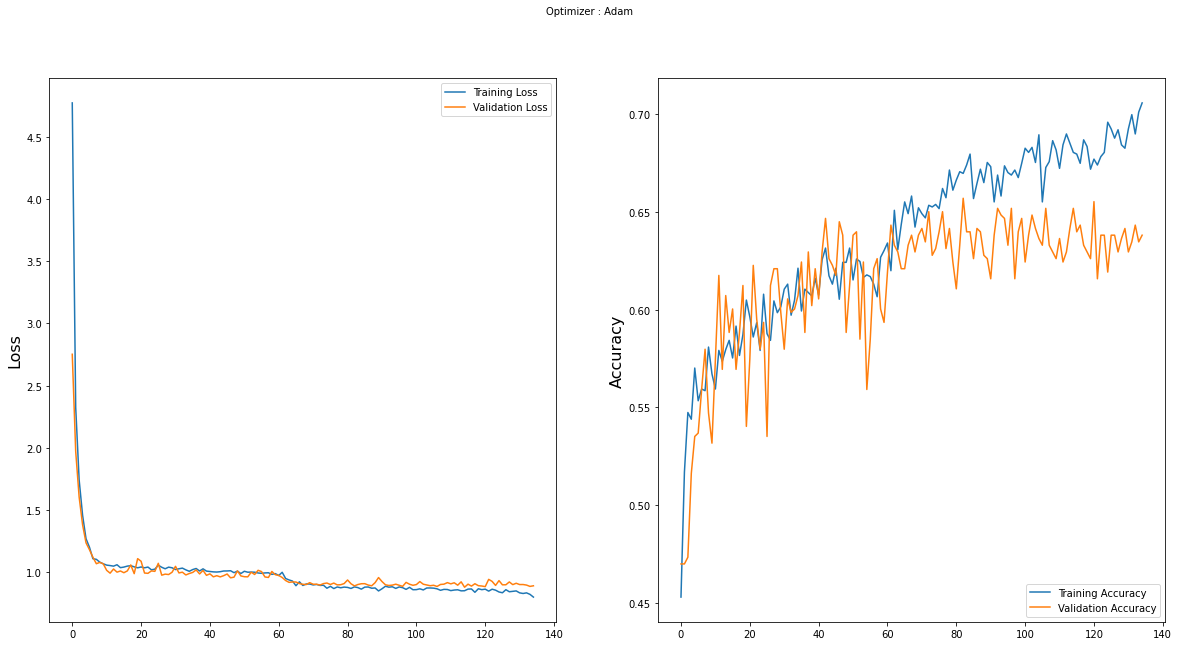

In [ ]:
plotter_single(history_model_bi_conditional_encoding)

In [ ]:
getTestAccuracy(model_bi_conditional_encoding_train)

'63.17%'

In [ ]:
def model_bi_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, learning_rate=):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Target)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # First Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  first_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  a = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  a = Dropout(dropout_rate)(a)

  tweet_encoding_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (tweet_encoding_2, tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s) = tweet_encoding_2(a)



  ##########################
  # Second Branch (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  b = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  b = Dropout(dropout_rate)(b)

  target_encoder_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  final_encoder_out = target_encoder_2(b, initial_state=[tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s])


  attention_out_1 = attention()(first_encoder_out)
  attention_out_2 = attention()(final_encoder_out)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3


  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out_1)

  z = Dropout(dropout_rate)(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  q = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out_2)

  q = Dropout(dropout_rate)(q)

  q = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(q)

  q = Dropout(dropout_rate)(q)

  q = BatchNormalization(q)

  combined = tf.keras.layers.Concatenate()([z,q])


  final_output = Dense(nb_classes, activation="softmax")(combined)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTarget, inputTweet], outputs=final_output)

  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = learning_rate
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  

  return model

In [ ]:
model_bi_conditional_encoding_train = model_bi_conditional_encoding(embedding_dim=200, E_T = E_T_200d, learning_rate=0.0003)

# Define Fitting Parameters
VAL_SPLIT = 0.2
MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr=0.0001)

CALLBACKS = [early_stopping, lr_reducer]


history_model_bi_conditional_encoding = model_bi_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

## Hyperparameter Search

In this section, a grid search approach will be used to find the most optimal hyperparameters for the best model architecture designed in this notebook:

The hyperparameters that will be searched are (in order of importance):


*   Learning Rate (alpha)
*   Dropout Rate
*   L2 Regularization (lambda)
*   Batch Size



### Learning Rate

In [67]:
h_histories = {}

# Learning Rate Values (Previously determined desired range).
alpha_vals = [0.001, 0.0004, 0.0002, 0.0001]

# Perform grid search.
for val in alpha_vals:
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = val)

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_histories['model_ce_alpha'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 17s 234ms/step - loss: 4.7404 - accuracy: 0.4251 - val_loss: 3.6512 - val_accuracy: 0.4700
Epoch 2/50
73/73 [==============================] - 16s 222ms/step - loss: 3.3167 - accuracy: 0.5011 - val_loss: 2.8653 - val_accuracy: 0.4700
Epoch 3/50
73/73 [==============================] - 16s 220ms/step - loss: 2.6384 - accuracy: 0.5547 - val_loss: 2.4097 - val_accuracy: 0.5523
Epoch 4/50
73/73 [==============================] - 16s 219ms/step - loss: 2.2703 - accuracy: 0.5513 - val_loss: 2.1146 - val_accuracy: 0.5523
Epoch 5/50
73/73 [==============================] - 17s 227ms/step - loss: 1.9907 - accuracy: 0.5766 - val_loss: 1.8978 - val_accuracy: 0.5729
Epoch 6/50
73/73 [==============================] - 16s 222ms/step - loss: 1.8003 - accuracy: 0.5706 - val_loss: 1.7050 - val_accuracy: 0.5626
Epoch 7/50
73/73 [==============================] - 16s 224ms/step - loss: 1.6304 - accuracy: 0.5744 - val_loss: 1.5462 - val_accuracy: 0.5626

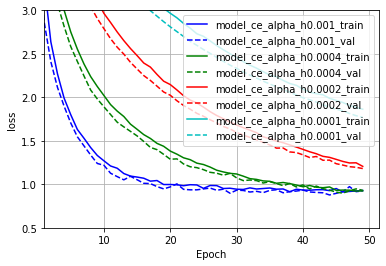

In [69]:
plotter(h_histories, ylim=[0.5,3])

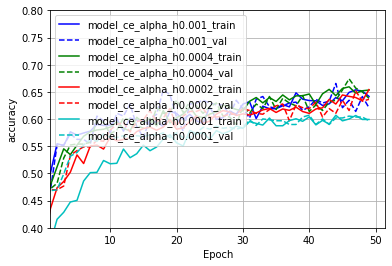

In [72]:
plotter(h_histories, metric="accuracy", ylim=[0.4,0.8])

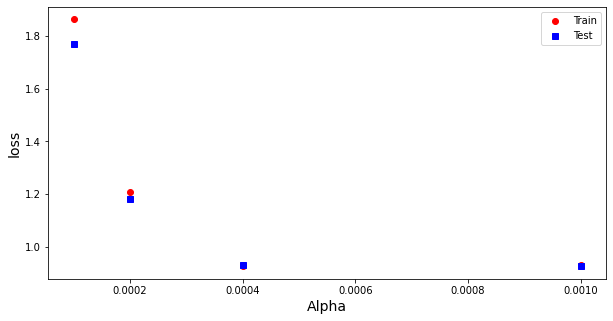

In [70]:
compare_params(params_list=alpha_vals, param_name="Alpha", model_name="model_ce_alpha")

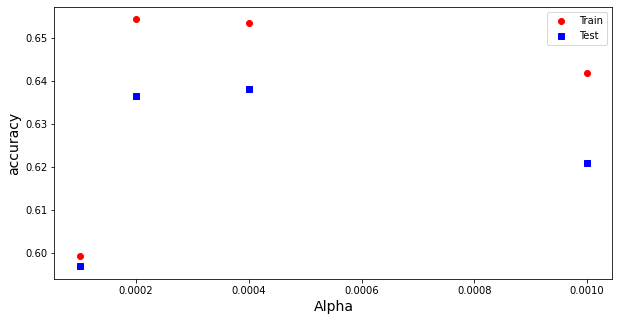

In [73]:
compare_params(metric="accuracy",params_list=alpha_vals, param_name="Alpha", model_name="model_ce_alpha")

### Dropout Rate

In [77]:
h_dropout_histories = {}

# Dropout values.
dropout_vals = [0.2, 0.4, 0.45, 0.55]

best_learning_rate = 0.0004

# Perform grid search.
for val in dropout_vals:
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate = val )

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_dropout_histories['model_ce_alpha'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 16s 223ms/step - loss: 4.9976 - accuracy: 0.4620 - val_loss: 4.2474 - val_accuracy: 0.4700
Epoch 2/50
73/73 [==============================] - 16s 213ms/step - loss: 3.7810 - accuracy: 0.5453 - val_loss: 3.4513 - val_accuracy: 0.4700
Epoch 3/50
73/73 [==============================] - 15s 210ms/step - loss: 3.1231 - accuracy: 0.5899 - val_loss: 2.9763 - val_accuracy: 0.4700
Epoch 4/50
73/73 [==============================] - 15s 212ms/step - loss: 2.7046 - accuracy: 0.5985 - val_loss: 2.6510 - val_accuracy: 0.5180
Epoch 5/50
73/73 [==============================] - 16s 214ms/step - loss: 2.4203 - accuracy: 0.6203 - val_loss: 2.4060 - val_accuracy: 0.5746
Epoch 6/50
73/73 [==============================] - 15s 211ms/step - loss: 2.1954 - accuracy: 0.6306 - val_loss: 2.2048 - val_accuracy: 0.5729
Epoch 7/50
73/73 [==============================] - 15s 211ms/step - loss: 2.0367 - accuracy: 0.6439 - val_loss: 2.0589 - val_accuracy: 0.5815

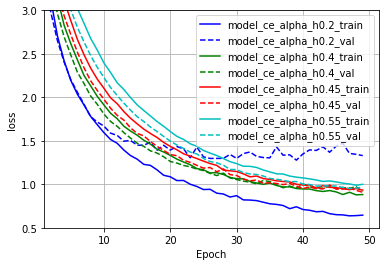

In [78]:
plotter(h_dropout_histories, ylim=[0.5,3])

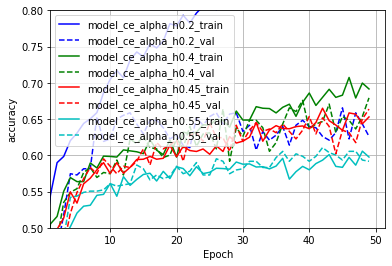

In [81]:
plotter(h_dropout_histories,metric="accuracy", ylim=[0.5,0.8])

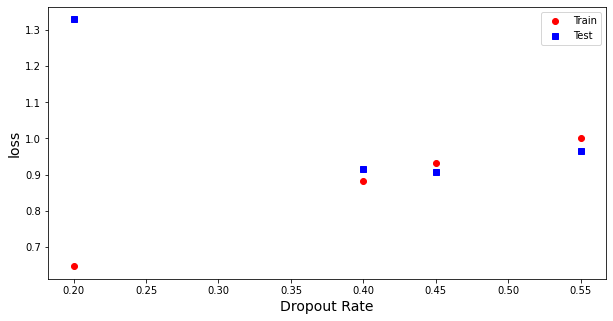

In [86]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_alpha")

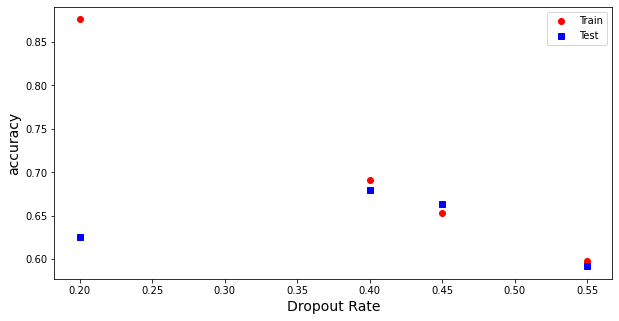

In [87]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_alpha", metric="accuracy")

### L2 Regularization

In [90]:
h_lambda_histories = {}

# L2 regularization values.
lambda_vals = [0.001, 0.0025, 0.005, 0.01]

best_learning_rate = 0.0004
best_dropout_rate = 0.4

# Perform grid search.
for val in lambda_vals:
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate=best_dropout_rate, lambda_val = val)

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_lambda_histories['model_ce_alpha'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 16s 221ms/step - loss: 2.9641 - accuracy: 0.3870 - val_loss: 2.6167 - val_accuracy: 0.4700
Epoch 2/50
73/73 [==============================] - 15s 211ms/step - loss: 2.5918 - accuracy: 0.4792 - val_loss: 2.4198 - val_accuracy: 0.4700
Epoch 3/50
73/73 [==============================] - 15s 210ms/step - loss: 2.3704 - accuracy: 0.5169 - val_loss: 2.2732 - val_accuracy: 0.4700
Epoch 4/50
73/73 [==============================] - 15s 210ms/step - loss: 2.2196 - accuracy: 0.5290 - val_loss: 2.1482 - val_accuracy: 0.5094
Epoch 5/50
73/73 [==============================] - 15s 211ms/step - loss: 2.0983 - accuracy: 0.5380 - val_loss: 2.0419 - val_accuracy: 0.5489
Epoch 6/50
73/73 [==============================] - 15s 210ms/step - loss: 1.9866 - accuracy: 0.5689 - val_loss: 1.9342 - val_accuracy: 0.5609
Epoch 7/50
73/73 [==============================] - 15s 210ms/step - loss: 1.8888 - accuracy: 0.5796 - val_loss: 1.8348 - val_accuracy: 0.5592

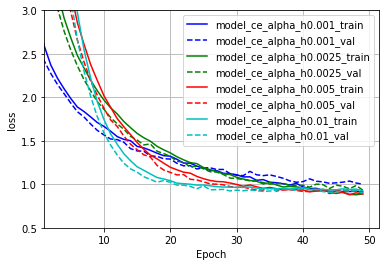

In [91]:
plotter(h_lambda_histories, ylim=[0.5,3])

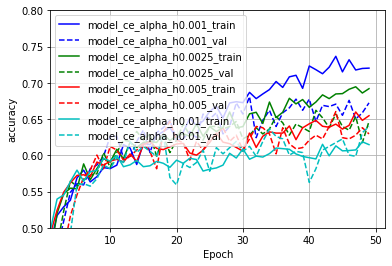

In [93]:
plotter(h_lambda_histories,metric="accuracy", ylim=[0.5,0.8])

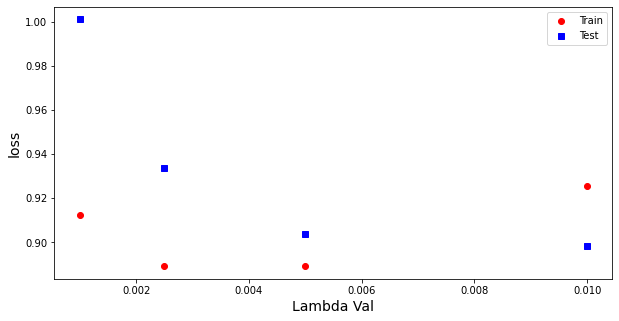

In [94]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_alpha")

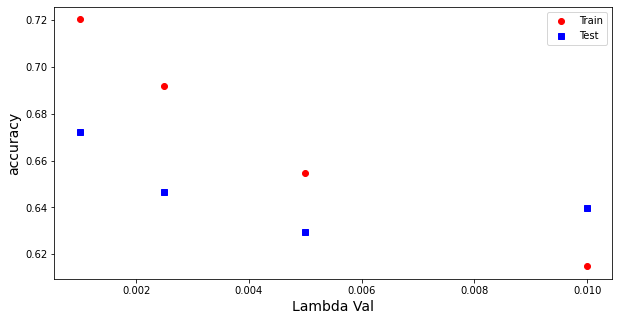

In [98]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_alpha", metric="accuracy")

### Batch Size

In [ ]:
h_batch_histories = {}

# Learning Rate Values.
batch_vals = [8, 16, 32, 64]

best_learning_rate = 0.0004
best_dropout_rate = 0.4
best_lambda_val = 0.005

# Perform grid search.
for val in batch_vals:
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate= best_dropout_rate, lambda_val= best_lambda_val )

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = val
  VERBOSE = 1
  SHUFFLE = True

  h_batch_histories['model_ce_batch'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/50
292/292 [==============================] - 65s 223ms/step - loss: 7.1139 - accuracy: 0.4346 - val_loss: 4.9322 - val_accuracy: 0.4700
Epoch 2/50
292/292 [==============================] - 65s 222ms/step - loss: 4.2639 - accuracy: 0.5212 - val_loss: 3.4365 - val_accuracy: 0.5523
Epoch 3/50
292/292 [==============================] - 64s 219ms/step - loss: 3.1857 - accuracy: 0.5384 - val_loss: 2.6797 - val_accuracy: 0.5798
Epoch 4/50
292/292 [==============================] - 64s 219ms/step - loss: 2.5630 - accuracy: 0.5483 - val_loss: 2.2279 - val_accuracy: 0.5575
Epoch 5/50
292/292 [==============================] - 64s 220ms/step - loss: 2.1423 - accuracy: 0.5594 - val_loss: 1.8751 - val_accuracy: 0.5729
Epoch 6/50
292/292 [==============================] - 64s 219ms/step - loss: 1.8324 - accuracy: 0.5628 - val_loss: 1.5929 - val_accuracy: 0.5798
Epoch 7/50
 71/292 [======>.......................] - ETA: 46s - loss: 1.6813 - accuracy: 0.5704

## Final Model 

### Training of final model with selected hyper-parameters

### Prediction on Unseen Data